In [1]:
import yt
import ytree
import numpy as np
import seaborn as sns

In [2]:
# Load ytree arbor and array of redshifts.
a = ytree.load('full_arbor/full_arbor.h5')
redshifts = np.load('stored_arrays/ytree_redshifts.npy')

# Set the maximum redshift to be included in analysis.
max_redshift = 12.

# Identify any bad datasets.
bad_redshifts = np.array([redshifts[23], redshifts[30]])
# Create mask to exlude high redshifts and bad redshifts.
mask = (redshifts < max_redshift)*[redshift not in bad_redshifts for redshift in redshifts]

# Update redshift array to include only redshifts of interest.
redshifts = redshifts[mask]

In [3]:
# Set minimum mass threshold for virialization. ~250 DM particles.
min_mass_threshold = 5e5

# Select all Pop III progenitor halos.
hlist = a.select_halos("tree['tree', 'is_popiii_progenitor'] == 1", fields=['is_popiii_progenitor'])
# Select only Pop III progenitor halos that are in redshifts of interest.
progenitors = np.array([halo for halo in hlist if halo['redshift'] in redshifts])

print('Number of progenitor halos:', len(progenitors))

# Set the overall minimum mass to be the minimum of the Pop III progenitor halo masses.
masses = [halo['sphere_mass'] for halo in progenitors]
min_mass = np.min(masses)

# Select all no-stars above the minimum mass threshold.
hlist = a.select_halos("(tree['tree', 'sphere_stellar_mass'] == 0) & (tree['tree', 'mass'] > {})"\
                       .format(min_mass_threshold), fields=['sphere_stellar_mass', 'mass'])
# Select only no-star halos that are in redshifts of interest.
no_star_halos = np.array([halo for halo in hlist if halo['redshift'] in redshifts])

print('Number of no-star halos:', len(no_star_halos))

# Set the overall maximum mass to be the maximum of the no-star halo masses.
masses = [halo['sphere_mass'] for halo in no_star_halos]
max_mass = np.max(masses)

print('Minimum mass (Msun):', min_mass)
print('Maximum mass (Msun):', max_mass)

# Select halos within min_mass and max_mass.
# Must be above minimum mass threshold for virialization.
# Must either have no stars or be a Pop III progenitor halo.
hlist = a.select_halos("(tree['tree', 'mass'] > {}) & (tree['tree', 'sphere_mass'] > {}) & \
                        (tree['tree', 'sphere_mass'] < {}) & ((tree['tree', 'sphere_stellar_mass'] == 0) | \
                        (tree['tree', 'is_popiii_progenitor'] == 1))"\
                       .format(min_mass_threshold, min_mass, max_mass), fields=['mass', 'sphere_mass'])

# Select only halos that are in the redshifts of interest.
halos = np.array([halo for halo in hlist if halo['redshift'] in redshifts])

/mnt/home/graceju1/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/mnt/home/graceju1/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/mnt/home/graceju1/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
Setting up trees:   0%|          | 0/4681 [00:00<?, ?it/s]/mnt/home/graceju1/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/mnt/home/graceju1/anaconda3/lib/python3.7/site-packages/h5py/

Number of progenitor halos: 55


/mnt/home/graceju1/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
Getting fields:   0%|          | 0/4681 [00:00<?, ?it/s]/mnt/home/graceju1/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/mnt/home/graceju1/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
Selecting halos: 100%|██████████| 4681/4681 [00:01<00:00, 4452.23it/s]
/mnt/home/graceju1/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWa

Number of no-star halos: 17677


/mnt/home/graceju1/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


Minimum mass (Msun): 4358867.967511095
Maximum mass (Msun): 38861821.560513675


In [5]:
# Create arrays of relevant parameters for each halo.

masses = np.array([halo['sphere_mass'] for halo in halos])
#central_density = np.array([halo['central_density'] for halo in halos])
#H2_fraction = np.array([halo['central_H2_fraction'] for halo in halos])
#H2_density = central_density*H2_fraction
#cooling_rate = central_density**2*H2_fraction
growth_rate = np.array([halo['sphere_mass_growth'] for halo in halos])
growth_derivative = -np.array([halo['sphere_mass_growth_derivative'] for halo in halos])
neighbor_distance = np.array([halo['neighbor_distance'] for halo in halos])
JLW = np.array([halo['sphere_J21_LW'] for halo in halos])
is_progenitor = np.array(['progenitor' if halo['is_popiii_progenitor'] == 1 else 'no stars' for halo in halos])

log_masses = np.log10(masses)
#log_central_density = np.log10(central_density)
#log_H2_fraction = np.log10(H2_fraction)
#log_H2_density = np.log10(H2_density)
#log_cooling_rate = np.log10(cooling_rate)
log_growth_rate = np.log10(growth_rate)
log_growth_derivative = np.log10(growth_derivative)
log_JLW = np.log10(JLW)
log_neighbor_distance = np.log10(neighbor_distance)

/mnt/home/graceju1/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/mnt/home/graceju1/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/mnt/home/graceju1/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/mnt/home/graceju1/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/mnt/home/graceju1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encoun

In [6]:
# Create a dataframe with all of the parameters for each halo and a label for 'progenitor' or 'no stars'

import pandas as pd

halo_data = {'masses':log_masses, 'growth_rate':log_growth_rate, 'growth derivative':log_growth_derivative, \
             'neighbor distance':log_neighbor_distance, 'J21 LW':log_JLW, \
             'is_progenitor':is_progenitor}

halo_df = pd.DataFrame(halo_data)

halo_df

,masses,growth_rate,growth derivative,neighbor distance,J21 LW,is_progenitor
0,7.111933,-8.254537,-14.863671,0.349511,-3.213054,progenitor
1,6.944229,-7.247011,NaN,0.336040,-3.202724,no stars
2,6.713779,-7.599894,NaN,0.197245,-2.262914,no stars
3,6.658669,-7.216876,NaN,0.004597,-2.481056,no stars
4,6.779703,-8.207134,-15.834676,0.355657,-1.492940,progenitor
5,6.743304,-8.055005,NaN,0.371851,-2.576921,no stars
6,6.690681,-8.044556,NaN,0.404388,-3.241118,no stars
7,6.670241,-7.545296,NaN,0.016959,-4.704634,no stars
8,6.701235,NaN,-14.426151,0.036830,-2.329680,no stars
9,6.760812,-7.489035,NaN,-0.085844,-3.401843,no stars


/mnt/home/graceju1/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/mnt/home/graceju1/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


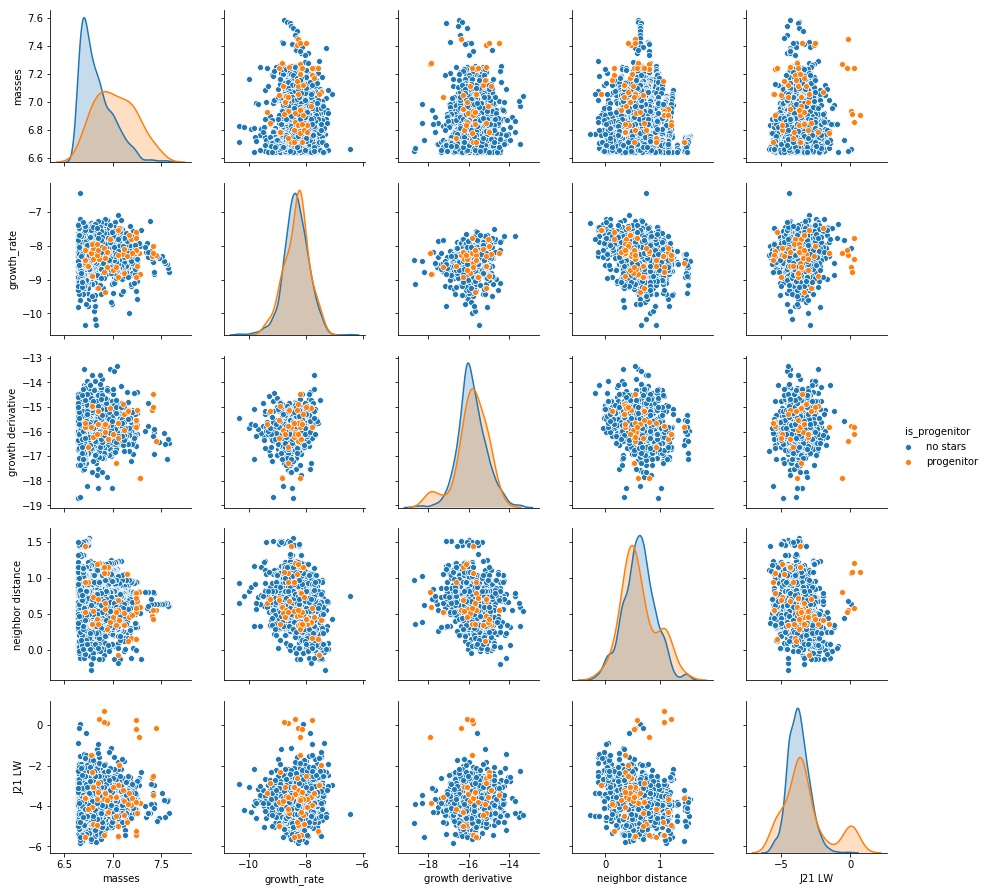

In [7]:
pairplots = sns.pairplot(halo_df, hue="is_progenitor", hue_order=['no stars', 'progenitor'])
pairplots.savefig('pairplots')